# ISIS Ionogram Trace Reading

This code is an alternative simple approach to extract the ionogram trace without all the background noise in the original image

**Trace**: Throughout this notebook, "trace" will be used to refer to the graphs on the ionograms containing the recorded data.

In [72]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from skimage import feature
from pylab import array

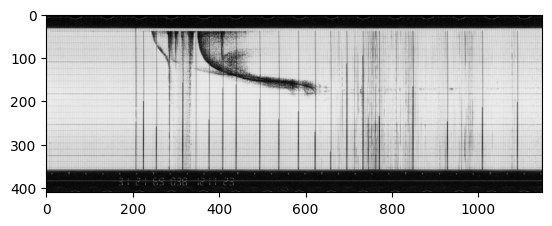

In [81]:
# Use a single image as an example
data_dir = 'U:/isis_extra/QA'
im = plt.imread(data_dir+'/b20_R014207709_B1-34-47 ISIS-A C-102-21_Image0264.png')
plt.imshow(im)

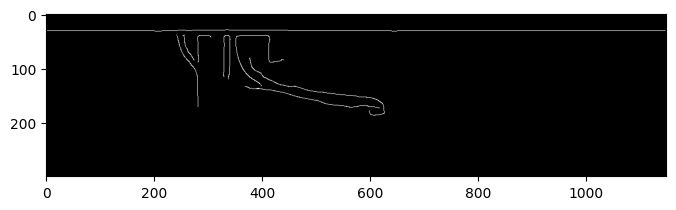

In [82]:
# Use scikit-image Cannymulti-stage edge filter to detect ionogram edges
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 3))
# Results could differe widely depending on the sigma parameter (standard deviation of the Gaussian filter). A SD of 5 seems to provide the best results
im = array(Image.open(data_dir+'/b20_R014207709_B1-34-47 ISIS-A C-102-21_Image0264.png').convert('L'))
im_edges = feature.canny(im[:300],sigma=5)
ax.imshow(im_edges, cmap='gray')
ax.set_title('', fontsize=20)
plt.show()

In [83]:
def find_deepest_signal(im_edges):
    """Extract horizontal and vertical position of the deepest pixel corresponding to the ionogram trace
    :param im_edges: two dimensional array representing the raw ionogram
    :type im_edges: 'numpy.ndarray'
    :returns deepest_pixel_xy
    :rtype: 'numpy.int64 tuple'
    """
    image_array = np.array(im_edges)
    true_indices = np.argwhere(image_array)
    sorted_indices = true_indices[np.lexsort((true_indices[:,1],-true_indices[:,0]))]
    deepest_pixel_xy = (sorted_indices[0][1],sorted_indices[0,0])
    
    return (deepest_pixel_xy)

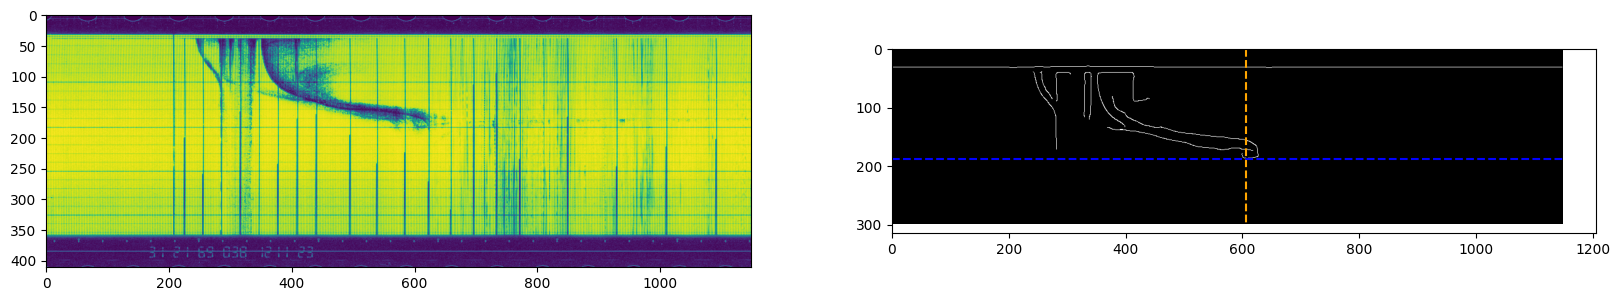

In [94]:
# Visualize original image and processed image
im = array(Image.open(data_dir+'/b20_R014207709_B1-34-47 ISIS-A C-102-21_Image0264.png').convert('L'))
im_edges = feature.canny(im[:300],sigma=5)
x_position,y_position = find_deepest_signal(im_edges)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
ax[0].imshow(im)
ax[0].set_title('', fontsize=20)

x_position,y_position = find_deepest_signal(im_edges)
ax[1].imshow(im_edges, cmap='gray')
ax[1].vlines(x_position, 0, im_edges.shape[0], linestyle='--', color='orange', label='frequency at max depth')
ax[1].hlines(y_position, 0, im_edges.shape[1], linestyle='--', color='blue', label='max depth')
plt.show()

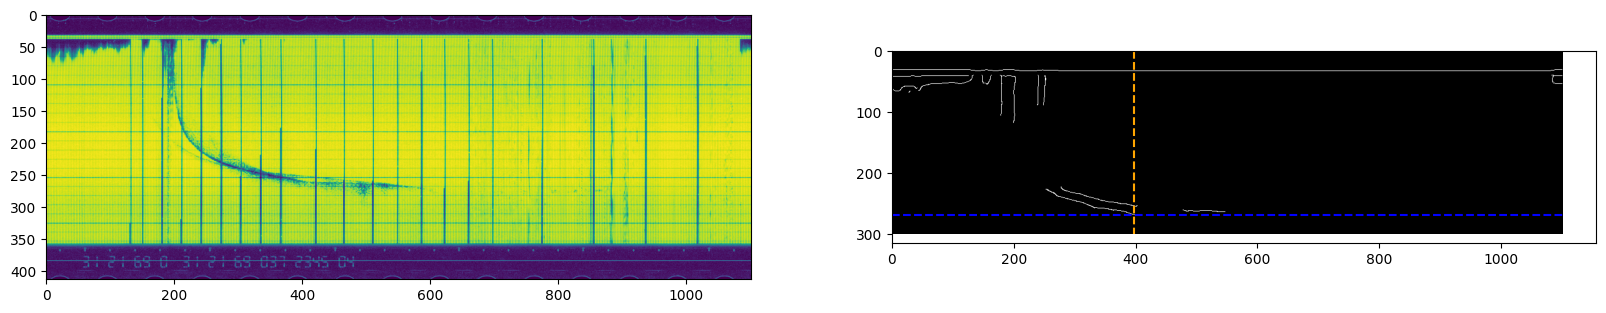

In [100]:
# This approach have good results in most of the ionograms
im = array(Image.open(data_dir+'/b20_R014207709_B1-34-47 ISIS-A C-102-21_Image0213.png').convert('L'))
im_edges = feature.canny(im[:300],sigma=5)
x_position,y_position = find_deepest_signal(im_edges)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
ax[0].imshow(im)
ax[0].set_title('', fontsize=20)
ax[1].imshow(im_edges, cmap='gray')
ax[1].vlines(x_position, 0, im_edges.shape[0], linestyle='--', color='orange', label='frequency at max depth')
ax[1].hlines(y_position, 0, im_edges.shape[1], linestyle='--', color='blue', label='max depth')
plt.show()

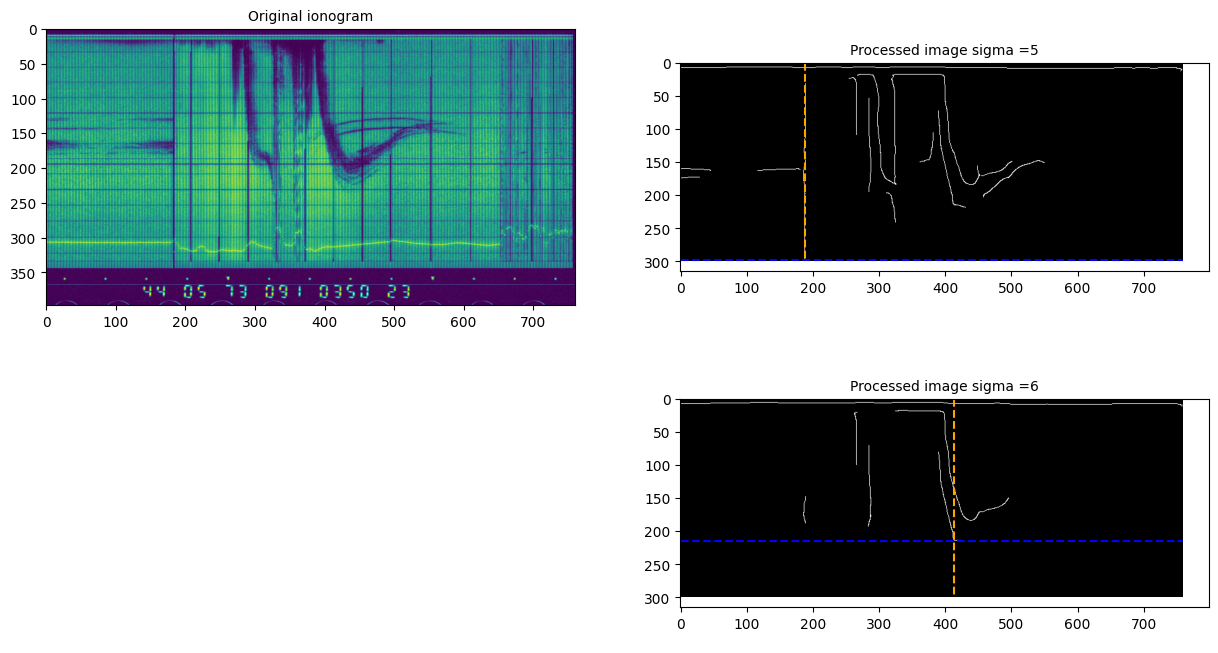

In [129]:
# Some ionograms could require a higher sigma (standard deviation of the Gaussian filter) to improove its processing
im = array(Image.open(data_dir+'/b9_R014207778_B1-35-28 ISIS B D-944_Image0428.png').convert('L'))

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 8))
ax[0,0].imshow(im)
ax[0,0].set_title('Original ionogram', fontsize=10)

im_edges = feature.canny(im[:300],sigma=5)
x_position,y_position = find_deepest_signal(im_edges)
ax[0,1].imshow(im_edges, cmap='gray')
ax[0,1].vlines(x_position, 0, im_edges.shape[0], linestyle='--', color='orange', label='frequency at max depth')
ax[0,1].hlines(y_position, 0, im_edges.shape[1], linestyle='--', color='blue', label='max depth')
ax[0,1].set_title('Processed image sigma =5', fontsize=10)

ax[1,0].axis('off')

im_edges = feature.canny(im[:300],sigma=6)
x_position,y_position = find_deepest_signal(im_edges)


ax[1,1].imshow(im_edges, cmap='gray')
ax[1,1].vlines(x_position, 0, im_edges.shape[0], linestyle='--', color='orange', label='frequency at max depth')
ax[1,1].hlines(y_position, 0, im_edges.shape[1], linestyle='--', color='blue', label='max depth')
ax[1,1].set_title('Processed image sigma =6', fontsize=10)

plt.show()

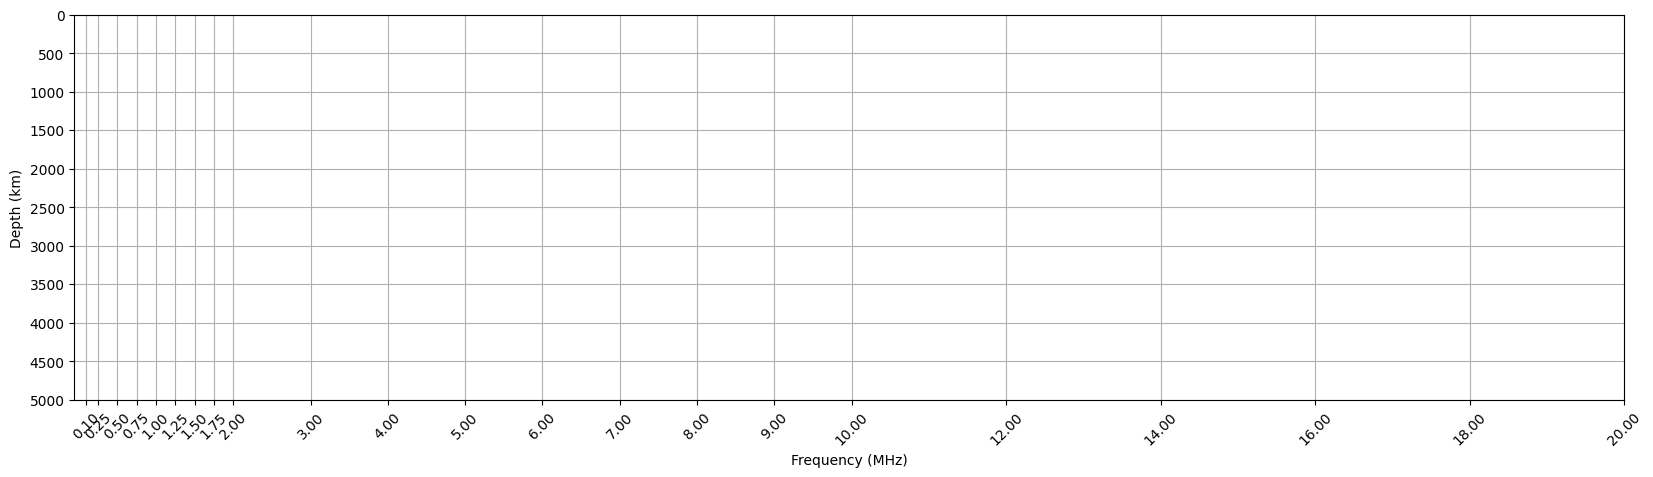

In [130]:
HZ = [0.1,0.25,0.5,0.75,1.0,1.25,1.5,1.75,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,12.0,14.0,16.0,18.0,20.0]
DEFAULT_HZ_COORD = [11,42,72,209,255,293,324,375,414,444,475,507,537,569,616,652,686,723,758,790,822,864]

MEAN_HZ = [0.5*(num + DEFAULT_HZ_COORD[i+1])for i, num in enumerate(DEFAULT_HZ_COORD[:-1])]
UPPER_LIMIT_HZ_COORD =[89] + MEAN_HZ 
LOWER_LIMIT_HZ_COORD = MEAN_HZ + [1510]

KM_DEFAULT_100 =   17.5  
KM_DEFAULT_200 =   35 


x_vals = HZ
y_vals = [5000, 4500, 4000, 3500 ,3000, 2500, 2000, 1500, 1000, 500, 0]

plt.figure(figsize=(20, 5))
plt.gca().invert_yaxis()
plt.plot()
plt.grid(True)
plt.xticks(x_vals, rotation = 45)
plt.xlabel("Frequency (MHz)")
plt.yticks(y_vals)
plt.ylabel("Depth (km)")
plt.show()